<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/EVPV_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belohorizonte Examen Pregunta 3

Edwin Solís

2020.09.05

3	Vamos a considerar que el alimentador Belo Horizonte tiene 2000 clientes conectados. Realizar la previsión de la demanda para cada uno de los días el mes de mayo para el año 2023 bajo las siguientes consideraciones:

a.	Crecimiento vegetativo de la demanda (estimar un porcentaje del 3% con respecto al año anterior)

b.	Estimar un porcentaje de penetración de vehículos eléctricos en función del número de clientes del alimentador y agregar su impacto en la curva de la demanda.

c.	Estimar un porcentaje de penetración de generación fotovoltaico en función del número de clientes del alimentador para el escenario 2023 y agregar su gráfica en la curva de la demanda.


In [ ]:
#@title
## Librerías
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

url = 'https://raw.githubusercontent.com/esoliss/AMI/master/Dataset/mayBH.csv'
df = pd.read_csv(url, error_bad_lines=False)


In [ ]:
df.columns[1]

'kW sd del'

# DEMANDA BH MAYO 2019


Se hace un resample de los datos, se selecciona mayo de 2019 como punto de partida

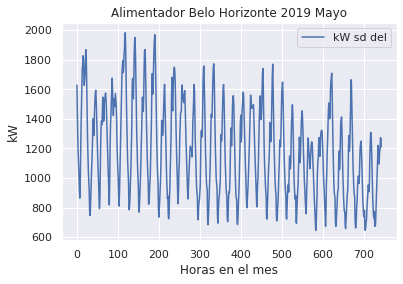

In [ ]:
df.plot()
plt.title('Alimentador Belo Horizonte 2019 Mayo')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()
dc=df.copy()  


Crecimiento vegetativo de la demanda

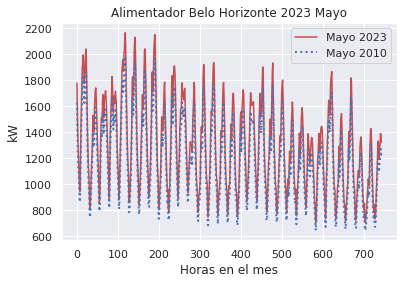

In [ ]:
x = np.arange(0,744,step=1)
for year in range(3):
  df[df.columns[1]]=df[df.columns[1]]*1.03
plt.plot(x,df[df.columns[1]],label='Mayo 2023',color='r')
plt.plot(x,dc[df.columns[1]],label='Mayo 2010',color='b',linestyle=':',linewidth=2)
plt.title('Alimentador Belo Horizonte 2023 Mayo')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()  


# PENETRACIÓN DE VEHÍCULOS ELÉCTRICOS




Se considera que el 10% de los usuarios al año 2023 disponen de EV

Para 200 Vehiculos electricos se ejecuta la simulación con el archivo de excel

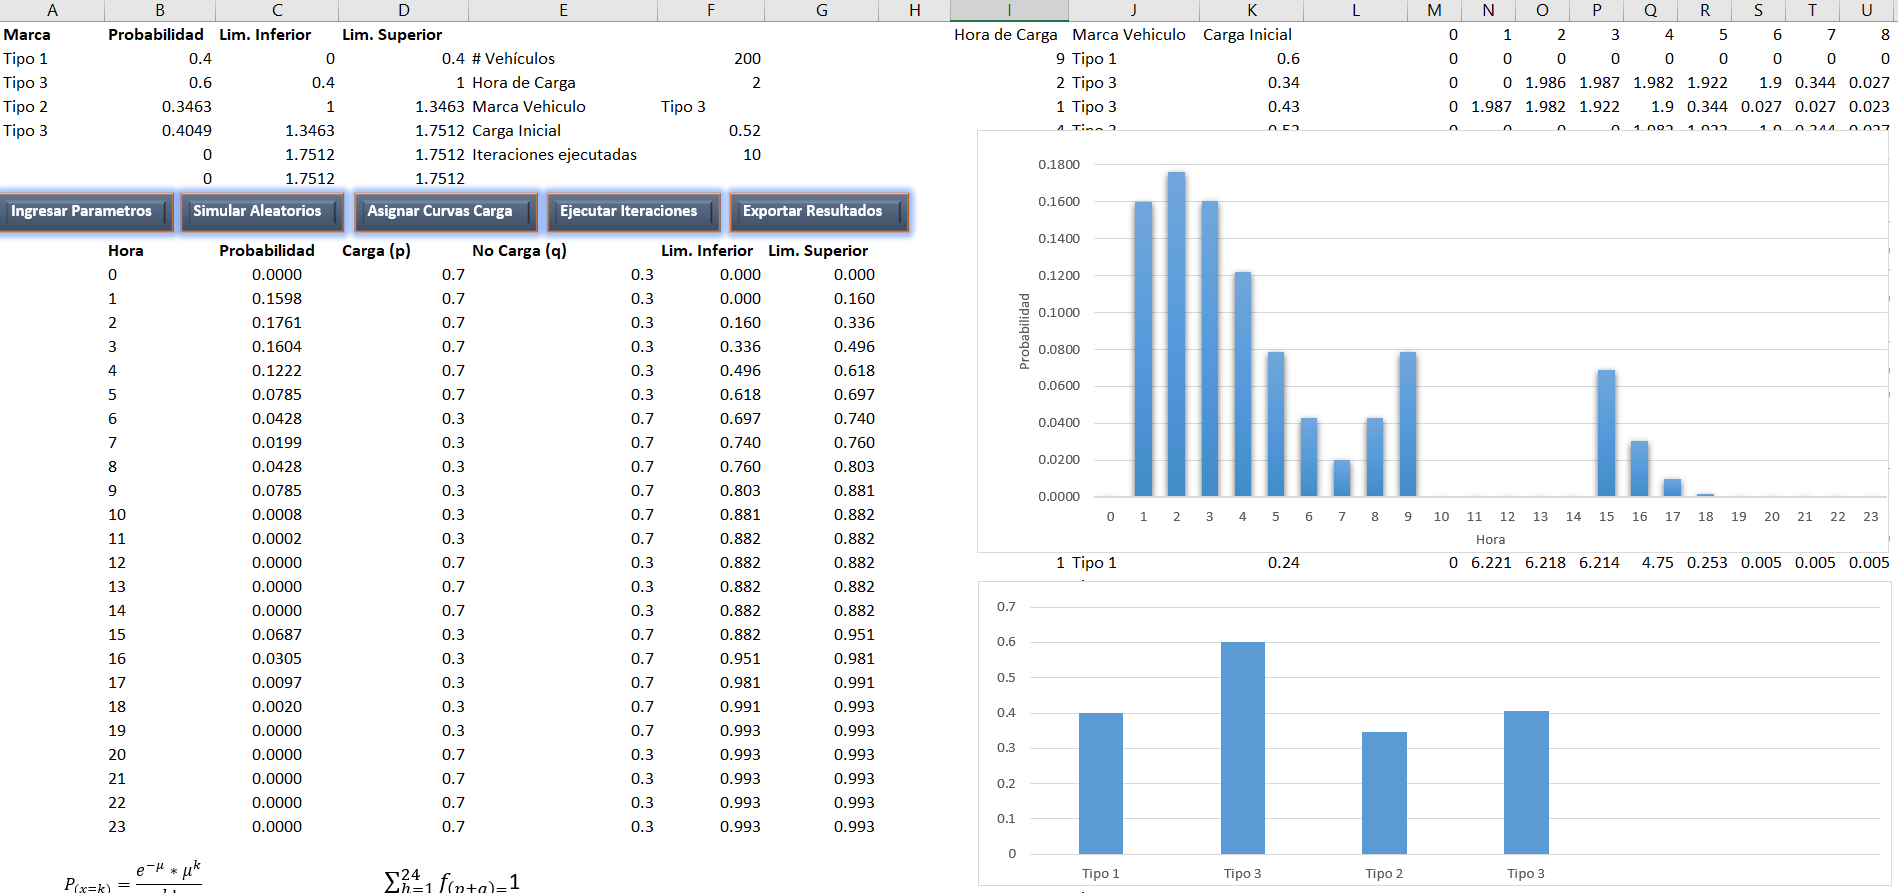

In [ ]:
# importacion de datos de MC
urlev = 'https://raw.githubusercontent.com/esoliss/AMI/master/Dataset/gyepv.csv'
evc = pd.read_csv(urlev, error_bad_lines=False)
#ev1 = ev2.drop(ev2.columns[-1],axis=1)
#ev = ev1.drop(ev1.columns[-1],axis=1)
#evl=ev.describe()
#evc = evl.loc[ 'mean' , : ]

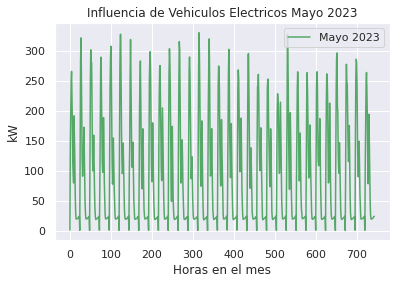

In [ ]:
# Asignar datos a un mes completo
evd = []
for day in range(31):
  evd.append(np.array(evc.loc[day,:]))
Lev = np.hstack(evd)
evda = {'hour':x,'ev':Lev}
evdf = pd.DataFrame(evda)
plt.plot(x,evdf['ev'],label='Mayo 2023',color='g')
plt.title('Influencia de Vehiculos Electricos Mayo 2023')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()  

SUMAR INFLUENCIA DE EV A LA DEMANDA DE 2023

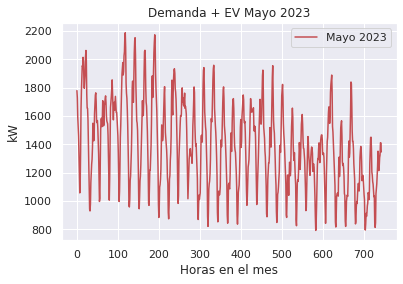

In [ ]:
plt.plot(x,evdf['ev']+df[df.columns[1]],label='Mayo 2023',color='r')
plt.title('Demanda + EV Mayo 2023')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()  

# PANELES SOLARES

Se considera:

- 15% de los usuarios con PV
- Cada usuario dispone de 60 metros cuadrados

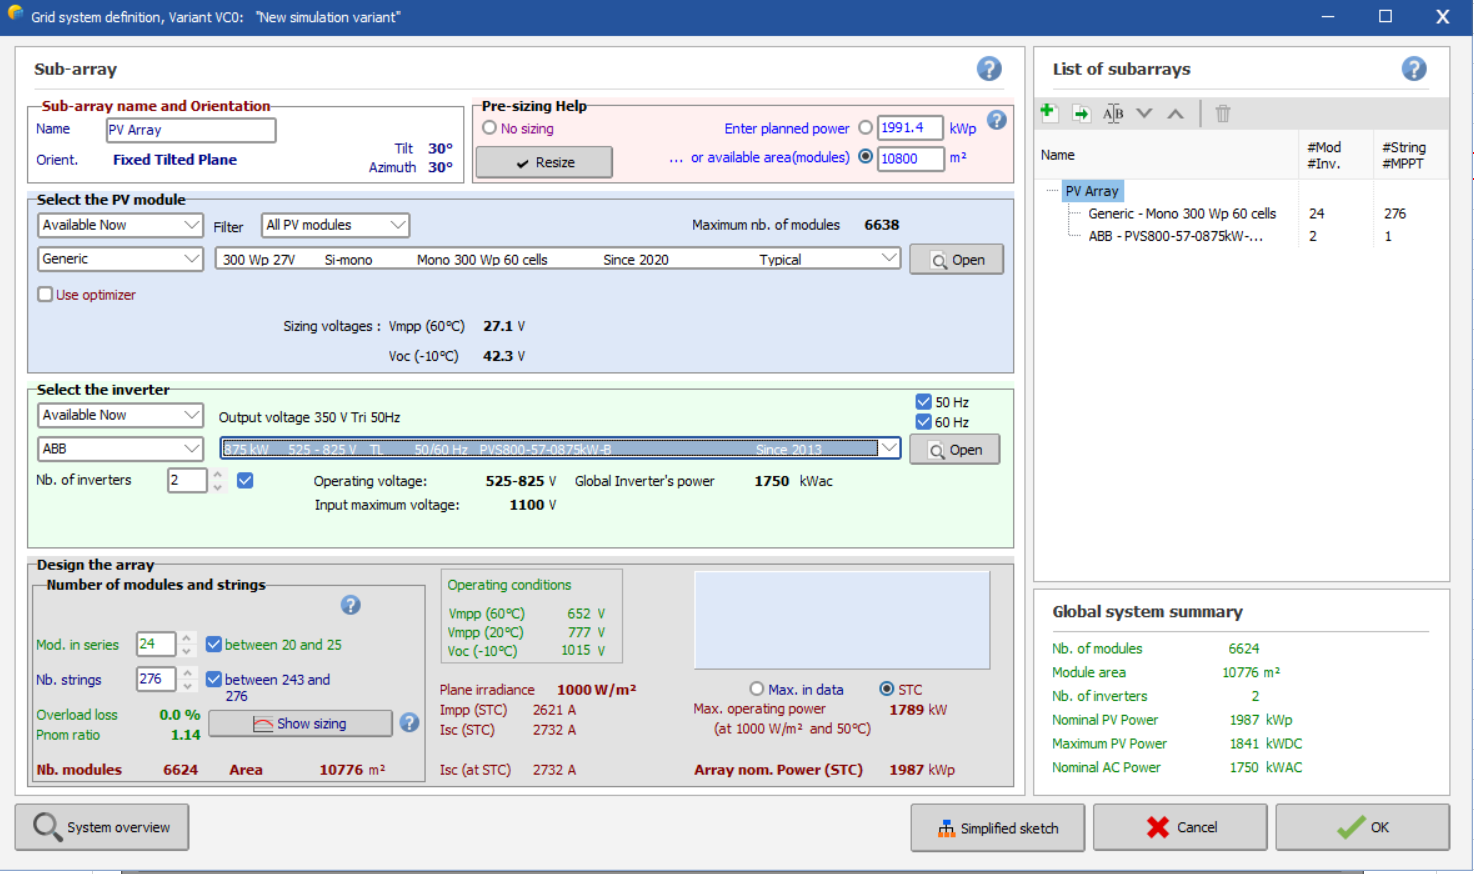

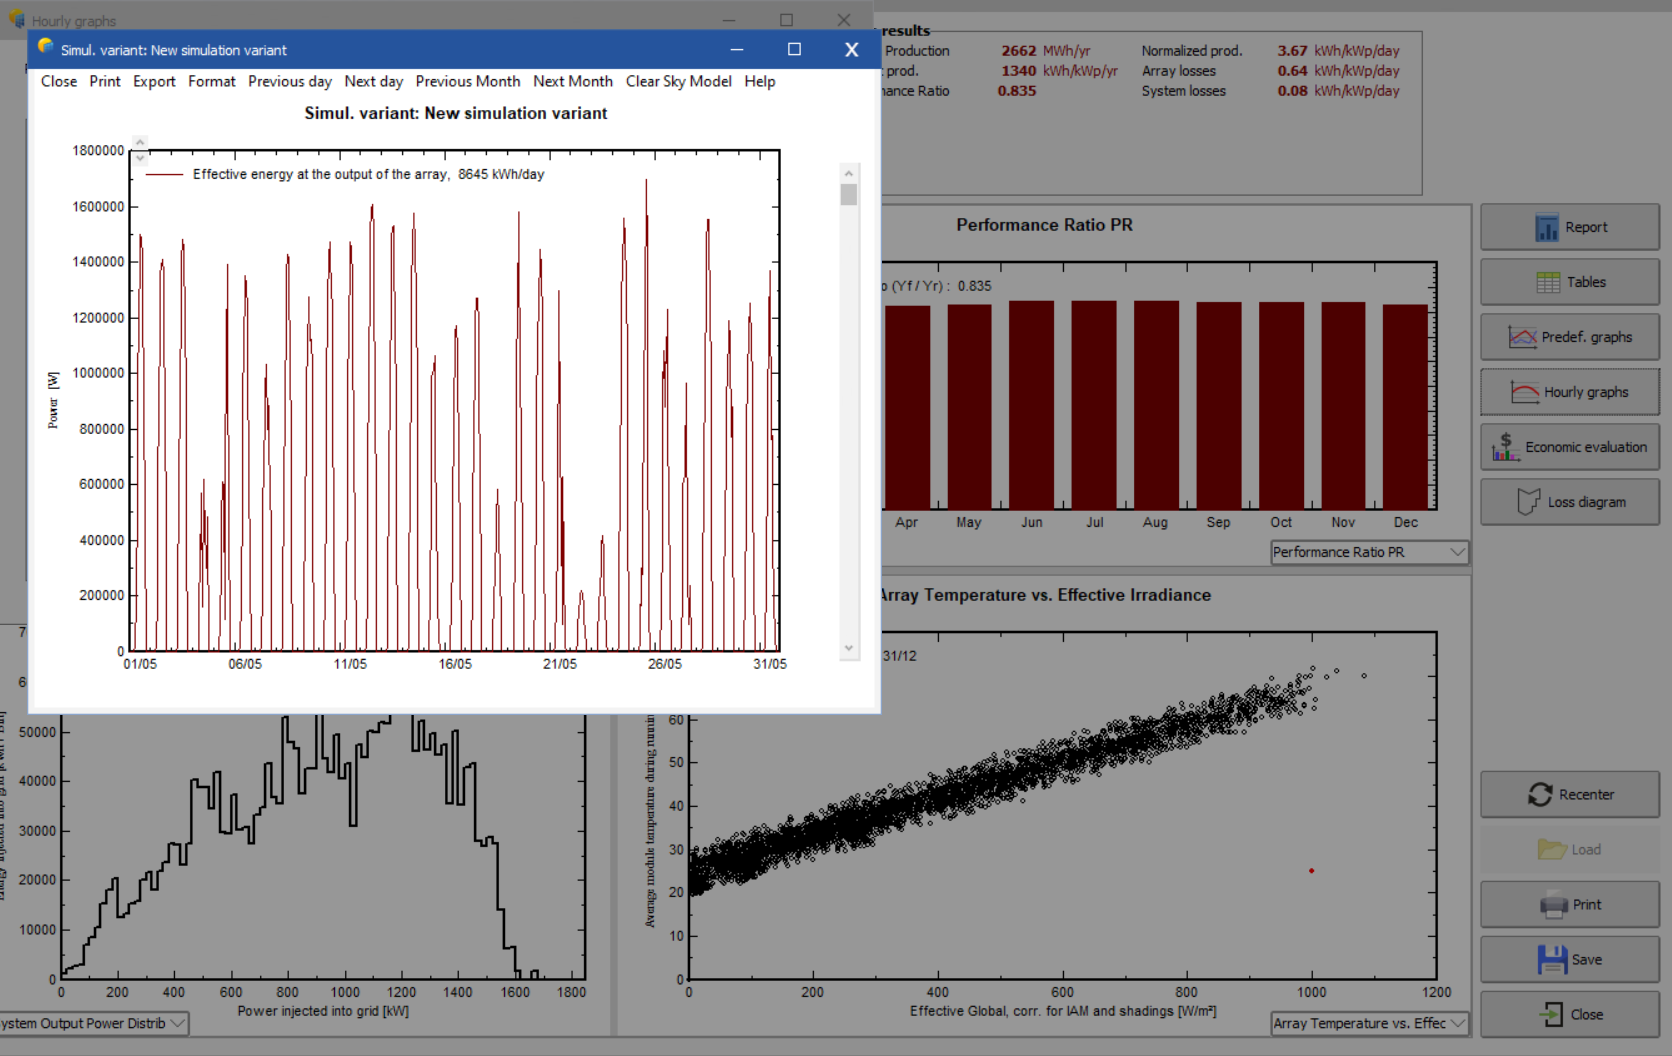

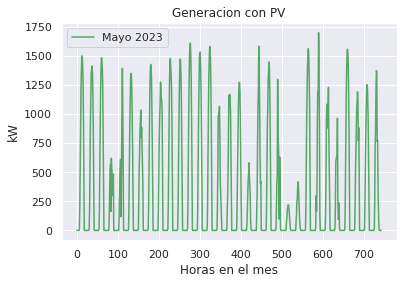

In [ ]:
# importacion de datos de PV
urlpv = 'https://raw.githubusercontent.com/esoliss/AMI/master/Dataset/pvGYE.csv'
pv = pd.read_csv(urlpv, error_bad_lines=False)
plt.plot(x,pv['Potencia']/1000,label='Mayo 2023',color='g')
plt.title('Generacion con PV')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()  

In [ ]:
pv.describe()

,Dato,Potencia
count,744.000000,7.440000e+02
mean,372.500000,3.602189e+05
std,214.918589,5.010025e+05
min,1.000000,0.000000e+00
25%,186.750000,0.000000e+00
50%,372.500000,0.000000e+00
75%,558.250000,6.596690e+05
max,744.000000,1.697996e+06


SE RESTA DE LA CURVA DE CARGA TOTAL

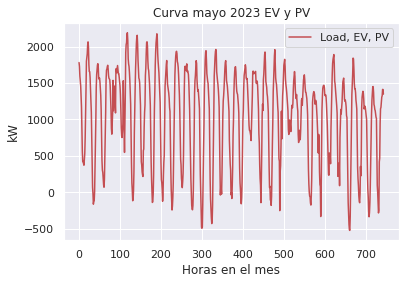

In [ ]:
plt.plot(x,evdf['ev']+df[df.columns[1]]-pv['Potencia']/1000,label='Load, EV, PV',color='r')
plt.title('Curva mayo 2023 EV y PV')
plt.xlabel('Horas en el mes')
plt.ylabel('kW')
plt.legend()
plt.show()  

# GRAFICAS INTERACTIVAS

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=evdf['ev'],
                    mode='lines',
                    name='EV'))
fig.add_trace(go.Scatter(x=x, y=df[df.columns[1]],
                    mode='lines',
                    name='Carga Mayo 2023'))
fig.add_trace(go.Scatter(x=x, y=-pv['Potencia']/1000,
                    mode='lines', name='PV'))

fig.show()

## Grafica de Sumatoria de curvas

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=df[df.columns[1]]-pv['Potencia']/1000,
                    mode='lines',
                    name='Curva Resultado'))
fig.add_trace(go.Scatter(x=x, y=dc[df.columns[1]],
                    mode='lines',
                    name='Carga Mayo 2019'))

fig.show()